# 資料前處理

In [14]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# load data
data = pd.read_csv('heart.csv')
row, column = data.shape

# data normalized
x_data = data.drop('target',axis=1)
norm_x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

training_set_x = []
training_set_y = []
testting_set_x = []
testting_set_y = []

index_list = list(range(row))
random.shuffle(index_list)

tranning_set_length = 100
for i in index_list[:tranning_set_length]:
    training_set_x.append(list(norm_x.iloc[i,:-1]))
    training_set_y.append(data.loc[i,'target'])

for i in index_list[tranning_set_length:]:
    testting_set_x.append(list(norm_x.iloc[i,:-1]))
    testting_set_y.append(data.loc[i,'target'])

training_set_x = np.array(training_set_x)
training_set_y = np.array(training_set_y)
testting_set_x = np.array(testting_set_x)
testting_set_y = np.array(testting_set_y)

# 建立深度學習模型

In [80]:
# ANN
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(50,activation=tf.nn.relu),
    keras.layers.Dense(25,activation=tf.nn.relu),
#    keras.layers.Dropout(0.2),
    keras.layers.Dense(2,activation=tf.nn.softmax),
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# 執行訓練及測試

In [81]:
m = model.fit(training_set_x,training_set_y,epochs=150,validation_split=0.2)
test_loss, test_acc = model.evaluate(testting_set_x, testting_set_y)

Train on 80 samples, validate on 20 samples
Epoch 1/150
80/80 [==============================] - 0s 3ms/sample - loss: 0.6886 - accuracy: 0.6000 - val_loss: 0.6814 - val_accuracy: 0.5500
Epoch 2/150
80/80 [==============================] - 0s 238us/sample - loss: 0.6628 - accuracy: 0.7000 - val_loss: 0.6740 - val_accuracy: 0.5500
Epoch 3/150
80/80 [==============================] - 0s 199us/sample - loss: 0.6435 - accuracy: 0.7250 - val_loss: 0.6683 - val_accuracy: 0.5500
Epoch 4/150
80/80 [==============================] - 0s 185us/sample - loss: 0.6230 - accuracy: 0.7625 - val_loss: 0.6612 - val_accuracy: 0.5500
Epoch 5/150
80/80 [==============================] - 0s 199us/sample - loss: 0.6053 - accuracy: 0.7375 - val_loss: 0.6539 - val_accuracy: 0.6500
Epoch 6/150
80/80 [==============================] - 0s 187us/sample - loss: 0.5872 - accuracy: 0.7625 - val_loss: 0.6457 - val_accuracy: 0.6500
Epoch 7/150
80/80 [==============================] - 0s 199us/sample - loss: 0.5687 - ac

Epoch 57/150
80/80 [==============================] - 0s 183us/sample - loss: 0.2322 - accuracy: 0.9125 - val_loss: 0.5284 - val_accuracy: 0.7000
Epoch 58/150
80/80 [==============================] - 0s 196us/sample - loss: 0.2293 - accuracy: 0.9125 - val_loss: 0.5272 - val_accuracy: 0.7000
Epoch 59/150
80/80 [==============================] - 0s 199us/sample - loss: 0.2288 - accuracy: 0.9125 - val_loss: 0.5247 - val_accuracy: 0.7000
Epoch 60/150
80/80 [==============================] - 0s 187us/sample - loss: 0.2249 - accuracy: 0.9125 - val_loss: 0.5283 - val_accuracy: 0.7000
Epoch 61/150
80/80 [==============================] - 0s 175us/sample - loss: 0.2243 - accuracy: 0.9125 - val_loss: 0.5326 - val_accuracy: 0.7000
Epoch 62/150
80/80 [==============================] - 0s 187us/sample - loss: 0.2212 - accuracy: 0.9125 - val_loss: 0.5277 - val_accuracy: 0.7000
Epoch 63/150
80/80 [==============================] - 0s 156us/sample - loss: 0.2185 - accuracy: 0.9125 - val_loss: 0.5253 -

Epoch 113/150
80/80 [==============================] - 0s 176us/sample - loss: 0.1277 - accuracy: 0.9500 - val_loss: 0.6126 - val_accuracy: 0.7000
Epoch 114/150
80/80 [==============================] - 0s 208us/sample - loss: 0.1273 - accuracy: 0.9500 - val_loss: 0.6061 - val_accuracy: 0.7000
Epoch 115/150
80/80 [==============================] - 0s 198us/sample - loss: 0.1247 - accuracy: 0.9500 - val_loss: 0.6045 - val_accuracy: 0.7000
Epoch 116/150
80/80 [==============================] - 0s 193us/sample - loss: 0.1237 - accuracy: 0.9500 - val_loss: 0.5991 - val_accuracy: 0.7000
Epoch 117/150
80/80 [==============================] - 0s 175us/sample - loss: 0.1204 - accuracy: 0.9500 - val_loss: 0.6053 - val_accuracy: 0.7000
Epoch 118/150
80/80 [==============================] - 0s 196us/sample - loss: 0.1198 - accuracy: 0.9625 - val_loss: 0.6142 - val_accuracy: 0.7000
Epoch 119/150
80/80 [==============================] - 0s 187us/sample - loss: 0.1197 - accuracy: 0.9625 - val_loss: 0

In [82]:
print('the accurancy of testing :',round(test_acc,4))

the accurancy of testing : 0.803


# 繪製訓練過程Loss過程圖

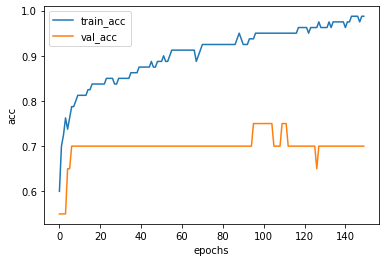

In [83]:
train_acc = m.history['accuracy']
val_acc = m.history['val_accuracy']

plt.plot(train_acc,label='train_acc')
plt.plot(val_acc,label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()